In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (20, 7)}
)

In [3]:
def get_plot(df, x_label, y_label, title):
    ax = df.plot()
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    sns.despine()

In [4]:
filtered_df = pd.read_csv('1_filtered_df.csv')

In [5]:
filtered_df.head()

,id,time,likes,comments,reposts,views,text,ctr,url,year,month,day,tags
0,320900,1605604268,57,3,3,7159,Мужчина ухаживает за животными уже 25 лет. Де...,0.80,https://knife.media/raccoon-whisperer/,2020,2020-11,2020-11-17,"['животные', 'видео', 'люди', 'находка']"
1,320899,1605604203,33,1,5,7926,"Знаете, как добывали подноготную правду, зачем...",0.42,https://knife.media/origin-of-idioms/,2020,2020-11,2020-11-17,"['языки', 'история', 'насилие', 'россия']"
2,320894,1605600004,22,0,2,7755,"От проектов, помогающих детям-сиротам, до IT-с...",0.28,https://knife.media/edu-projects/,2020,2020-11,2020-11-17,"['партнерский материал', 'образование', 'будущ..."
3,320828,1605546303,106,0,13,14448,"Сказки братьев Гримм знают и любят и все, хотя...",0.73,https://knife.media/bratya-grimm/,2020,2020-11,2020-11-16,"['книги', 'литература', 'люди', 'россия']"
4,320815,1605544203,182,30,22,28388,"Раса, пол и гендер для дзен-буддистов — пустот...",0.64,https://knife.media/queer-zen/,2020,2020-11,2020-11-16,"['ЛГБТ', 'религия']"


In [6]:
filtered_df.day = pd.to_datetime(filtered_df.day)

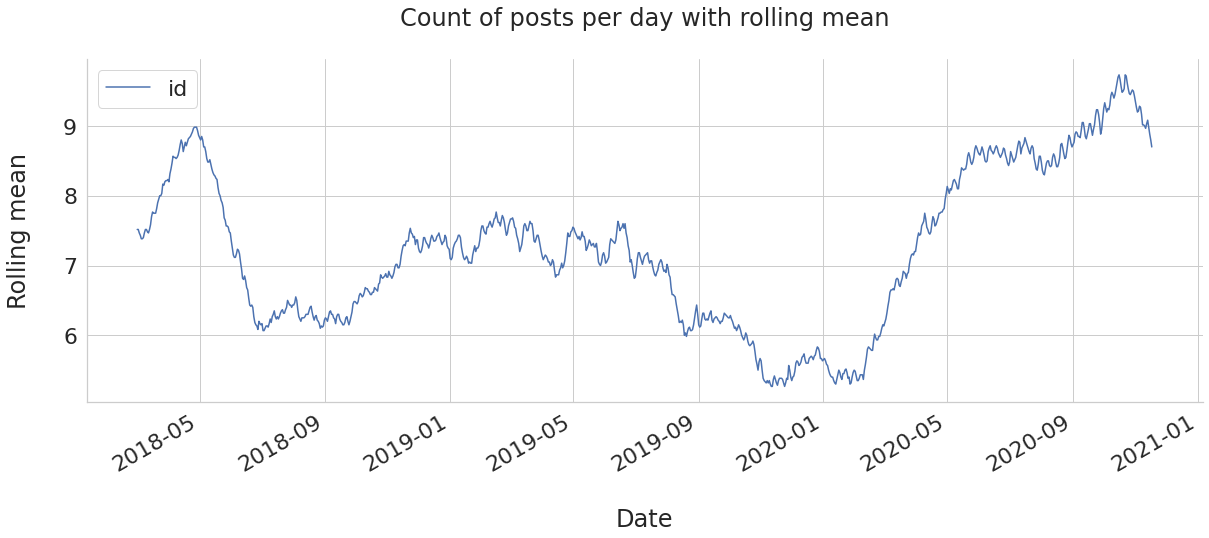

In [7]:
count_for_plot = filtered_df.groupby('day') \
    .agg({'id': 'count'}) \
    .rolling(60).mean() 
get_plot(count_for_plot, '\nDate', 'Rolling mean\n', 'Count of posts per day with rolling mean\n')

In [8]:
# с марта 2020 года наблюдается увеличение количества постов

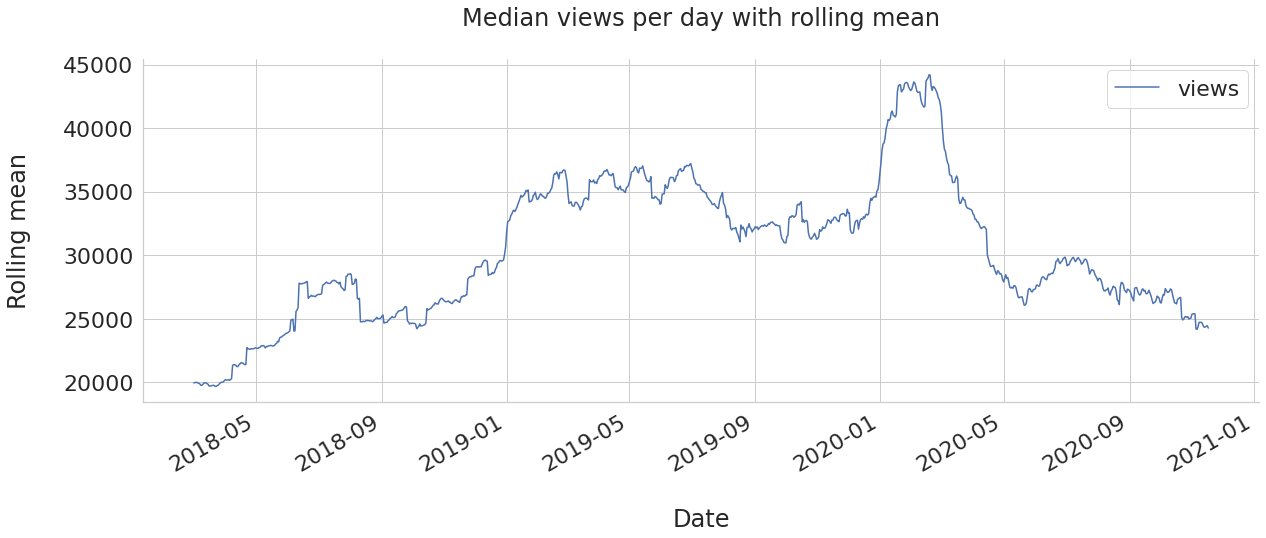

In [9]:
# views_for_plot = filtered_df.groupby('day') \
#     .agg({'views': 'mean'}) \
#     .rolling(60).mean()

views_for_plot_ = filtered_df.groupby('day') \
    .agg({'views': 'median'}) \
    .rolling(60).mean()
# get_plot(views_for_plot, '\nDate', 'Rolling mean\n', 'Mean views per day with rolling mean\n')
get_plot(views_for_plot_, '\nDate', 'Rolling mean\n', 'Median views per day with rolling mean\n')

In [10]:
# при этом уменьшается количество просмотров
# скачок, который наблюдается примерно с января по май, возможно, обусловлен ситуацией с ковидом

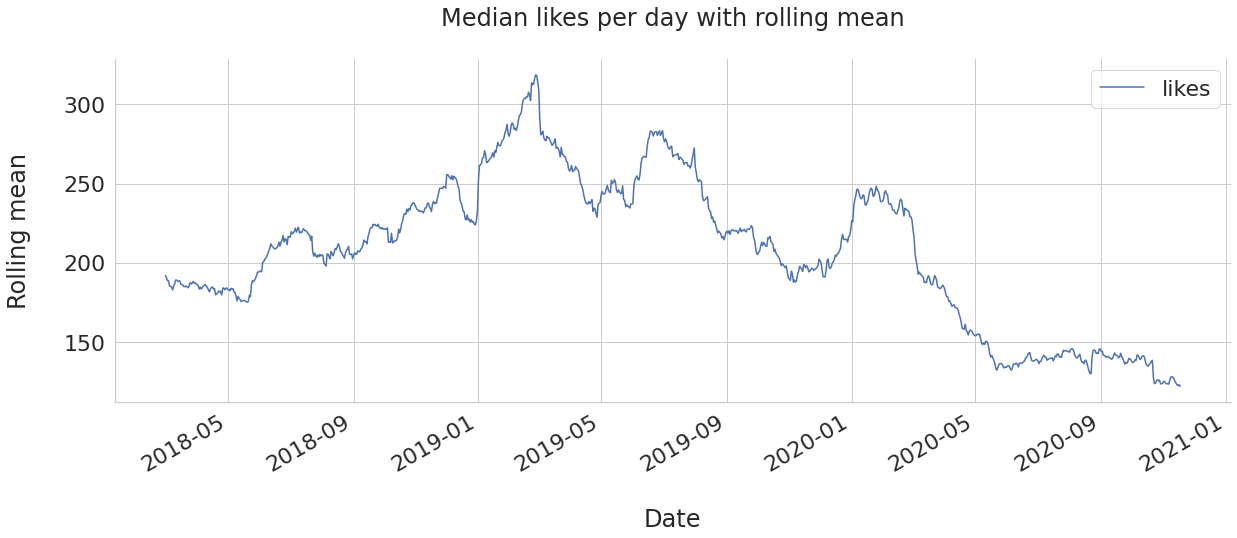

In [11]:
likes_for_plot = filtered_df.groupby('day') \
    .agg({'likes': 'median'}) \
    .rolling(60).mean()

get_plot(likes_for_plot, '\nDate', 'Rolling mean\n', 'Median likes per day with rolling mean\n')

In [12]:
# среднее количсество лайков также уменьшается с уменьшением просмотров

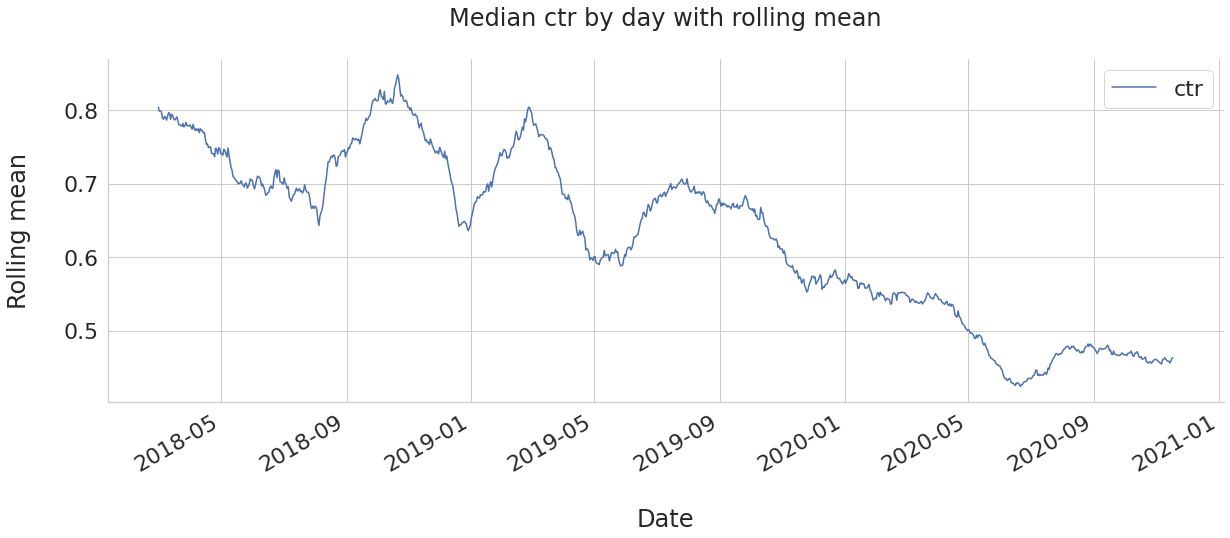

In [13]:
ctr_for_plot = filtered_df.groupby('day') \
    .agg({'ctr': 'median'}) \
    .rolling(60).mean() 

get_plot(ctr_for_plot, '\nDate', 'Rolling mean\n', 'Median ctr by day with rolling mean\n')

In [65]:
# отношение количества лайков к просмотрам в среднем также уменьшается, из чего можно заключить, 
# что, возможно, качество постов ухудшилось, либо пользователи стали менее активны

### Проверка равенства распределений ctr  по годам

In [16]:
filtered_df.head()

,id,time,likes,comments,reposts,views,text,ctr,url,year,month,day,tags
0,320900,1605604268,57,3,3,7159,Мужчина ухаживает за животными уже 25 лет. Де...,0.80,https://knife.media/raccoon-whisperer/,2020,2020-11,2020-11-17,"['животные', 'видео', 'люди', 'находка']"
1,320899,1605604203,33,1,5,7926,"Знаете, как добывали подноготную правду, зачем...",0.42,https://knife.media/origin-of-idioms/,2020,2020-11,2020-11-17,"['языки', 'история', 'насилие', 'россия']"
2,320894,1605600004,22,0,2,7755,"От проектов, помогающих детям-сиротам, до IT-с...",0.28,https://knife.media/edu-projects/,2020,2020-11,2020-11-17,"['партнерский материал', 'образование', 'будущ..."
3,320828,1605546303,106,0,13,14448,"Сказки братьев Гримм знают и любят и все, хотя...",0.73,https://knife.media/bratya-grimm/,2020,2020-11,2020-11-16,"['книги', 'литература', 'люди', 'россия']"
4,320815,1605544203,182,30,22,28388,"Раса, пол и гендер для дзен-буддистов — пустот...",0.64,https://knife.media/queer-zen/,2020,2020-11,2020-11-16,"['ЛГБТ', 'религия']"


In [20]:
# Посмотрим на медианное значение количества просмотров, чтобы сориентироваться в порядке представленных значений 
filtered_df.views.median()

25511.0

In [22]:
# Найдём 10-й перцентиль и будем использовать его для отбора статей
q = filtered_df.views.quantile(0.1)
q

16801.0

In [32]:
years_df = filtered_df.query("views > @q & likes > 0")[['year', 'ctr']]

In [65]:
years_df.head()

,year,ctr
4,2020,0.64
5,2020,0.71
6,2020,0.88
9,2020,0.43
12,2020,0.38


In [102]:
years_df.groupby('year', as_index=False) \
    .agg({'ctr': ['mean', 'median']})

year       ctr       
             mean median
0  2018  0.825082   0.73
1  2019  0.716126   0.66
2  2020  0.542783   0.50

In [35]:
year_2018_df = years_df.query("year == 2018")
year_2019_df = years_df.query("year == 2019")
year_2020_df = years_df.query("year == 2020")

Text(0.5, 1.0, 'Гистограмма ctr за 2018 год\n')

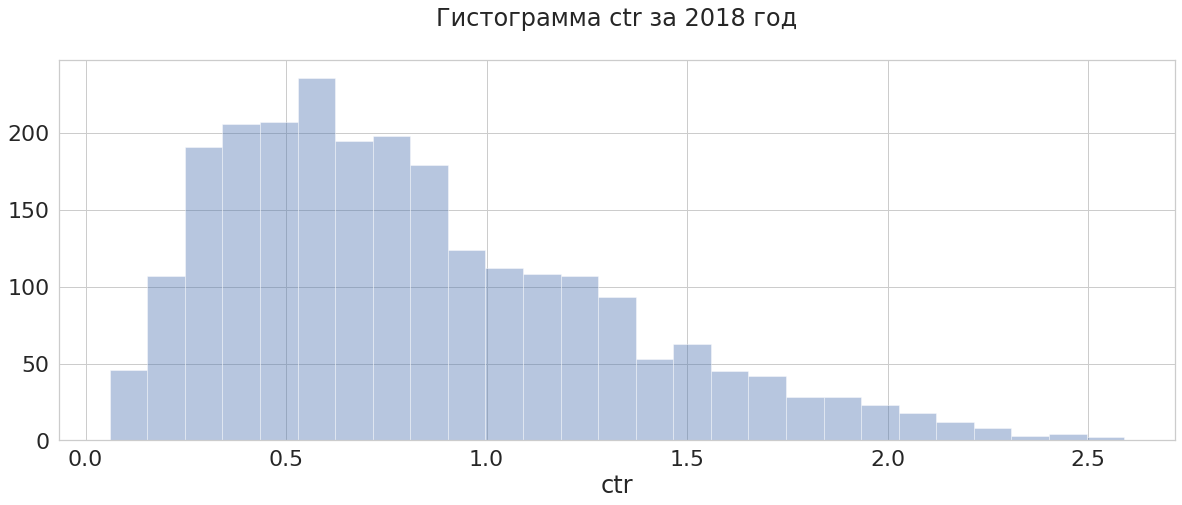

In [103]:
# Посмотрим на распределение значений ctr по годам
sns.distplot(year_2018_df.ctr, kde=False)
plt.title('Гистограмма ctr за 2018 год\n')

Text(0.5, 1.0, 'Гистограмма ctr за 2019 год\n')

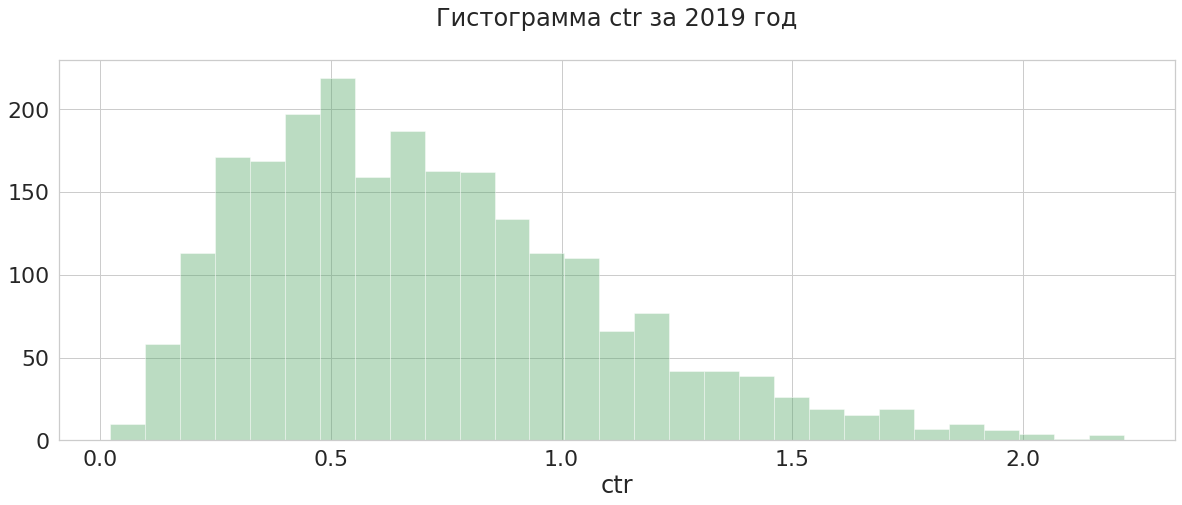

In [104]:
sns.distplot(year_2019_df.ctr, kde=False, color="g")
plt.title('Гистограмма ctr за 2019 год\n')

Text(0.5, 1.0, 'Гистограмма ctr за 2020 год\n')

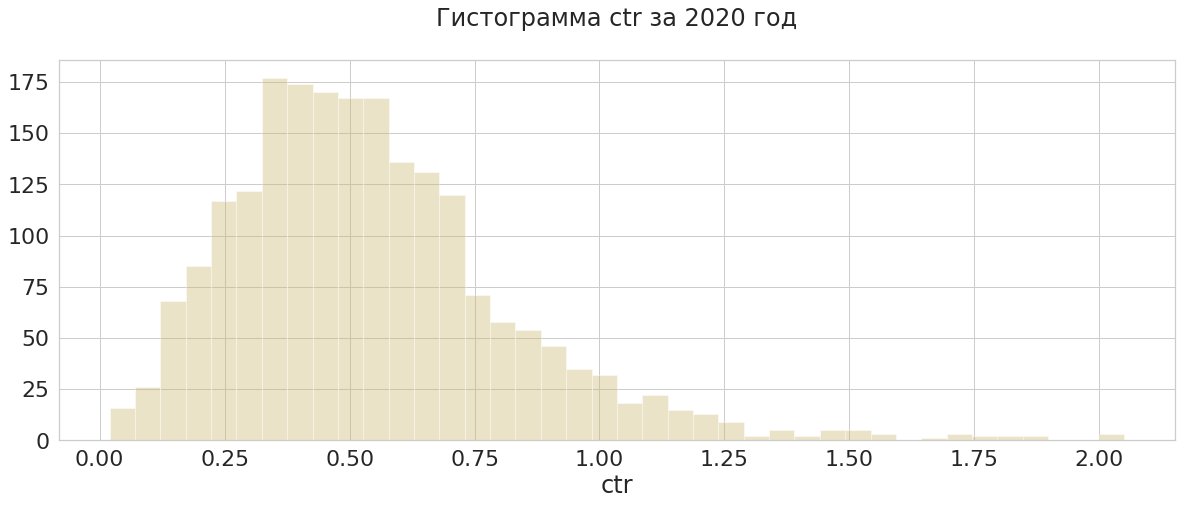

In [105]:
sns.distplot(year_2020_df.ctr, kde=False, color="y")
plt.title('Гистограмма ctr за 2020 год\n')

Text(0.5, 1.0, 'ctr по годам\n')

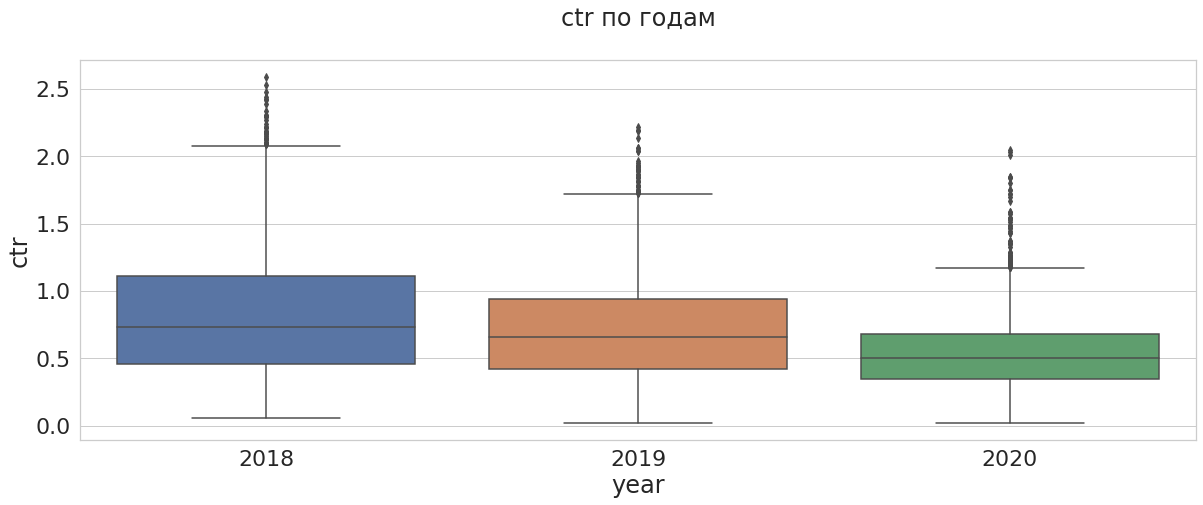

In [106]:
# Также построим на боксплот
sns.boxplot(x='year', y='ctr', data=years_df)
plt.title('ctr по годам\n')

In [52]:
# Визуально распределения выглядят скошенными вправо, проверим их на нормальность с помощью теста Шапиро-Уилка

In [83]:
from scipy.stats import shapiro
shapiro(year_2018_df.ctr.sample(1000, random_state=17))

(0.9343990087509155, 1.501716190610618e-20)

In [76]:
shapiro(year_2019_df.ctr.sample(1000, random_state=17))

(0.9530762434005737, 2.4500236093428525e-17)

In [56]:
shapiro(year_2020_df.ctr.sample(1000, random_state=17))

(0.9348036646842957, 1.7321544921011132e-20)

In [59]:
# p-value во всех случаях < 0.05, следовательно распределения нельзя назвать нормальными

In [67]:
# Проверим дисперсии внутри наших групп на гомогенность, используя тест Левена
from scipy.stats import levene
levene(year_2018_df.ctr,
      year_2019_df.ctr,
      year_2020_df.ctr)

LeveneResult(statistic=229.00702445480755, pvalue=5.283326578653465e-97)

In [68]:
# условие гомогенности дисперсий не соблюдается

In [69]:
# Проверим нулевую гипотезу о равенстве средних рангов с помощью теста Манна-Уитни для групп 2018-2019 и 2019-2020
from scipy.stats import mannwhitneyu

In [70]:
mannwhitneyu(year_2018_df.ctr,
            year_2019_df.ctr)

MannwhitneyuResult(statistic=2525298.0, pvalue=2.8425218535086875e-12)

In [73]:
mannwhitneyu(year_2020_df.ctr,
            year_2019_df.ctr)

MannwhitneyuResult(statistic=1787099.0, pvalue=1.1785637733167733e-53)

In [ ]:
# в обоих случаях p-value много меньше 0.05, что позволяет нам получить статистически значимый результат